In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import dynadojo as dd
import numpy as np

2023-08-20 16:35:58.141738: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


(<Figure size 640x480 with 1 Axes>, <Axes: >)

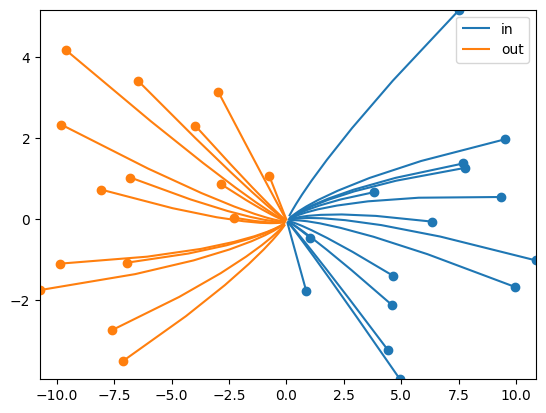

In [5]:
latent_dim = 2
embed_dim = 3
n = 15
timesteps = 10
system = dd.systems.LDSSystem(latent_dim, embed_dim, noise_scale=0)
x0 = system.make_init_conds(n)
y0 = system.make_init_conds(30, in_dist=False)
x = system.make_data(x0, control=np.zeros((n, timesteps, embed_dim)), timesteps=timesteps)
y = system.make_data(y0, control=np.zeros((n, timesteps, embed_dim)), timesteps=timesteps, noisy=True)
dd.utils.lds.plot([x, y], target_dim=min(latent_dim, 3), labels=["in", "out"], max_lines=15)

x_err=2.5985797860676008e-05
y_err=3.0092991076743113e-05


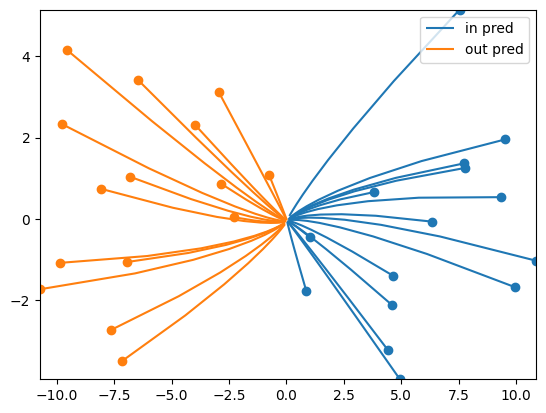

In [6]:
dmd = dd.baselines.DMD(embed_dim, timesteps, activation=None, max_control_cost=0)
dmd.fit(x)
x_pred = dmd.predict(x[:, 0], timesteps)
y_pred = dmd.predict(y[:, 0], timesteps)
dd.utils.lds.plot([x_pred, y_pred], target_dim=min(3, latent_dim), labels=["in pred", "out pred"], max_lines=15)
x_err = system.calc_error(x, x_pred)
y_err = system.calc_error(y, y_pred)
print(f"{x_err=}")
print(f"{y_err=}")